<a href="https://colab.research.google.com/github/YagoOrnstein/TensorFlow-Training/blob/main/Classification_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


A classificatiın is where you try to classft something as one thing or anorther.

A few types of classification problems:
- Binary Classification
- Multiclass Classification
- Multilabel Classification

Create data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Let's visualize the data

In [ ]:
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


Plotting

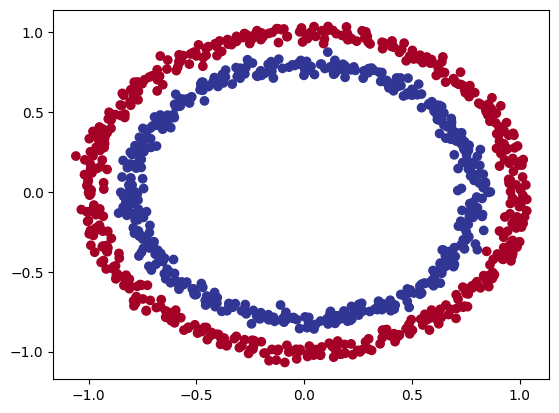

In [ ]:
plt.scatter(X[:, 0],X[:, 1], c=y, cmap=plt.cm.RdYlBu)

This is **Binary Classification** problem

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

# Modelling

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(X ,y ,epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 6.1416 - accuracy: 0.4870
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 6.1311 - accuracy: 0.4870
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 6.1085 - accuracy: 0.4870
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 6.0942 - accuracy: 0.4870
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 6.0933 - accuracy: 0.4870
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 6.0932 - accuracy: 0.4870
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 6.0921 - accuracy: 0.4870
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 6.0917 - accuracy: 0.4870
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 6.0912 - accuracy: 0.4870
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 6.0909 - accuracy: 0.4870
Epoch 11/20
32/32 [

In [ ]:
# Improve our model
model.fit(X,y,epochs=200,verbose=0)
model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 3.8333 - accuracy: 0.4800


[3.833279609680176, 0.47999998927116394]

Let's add an extra layer

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.fit(X,y,epochs=200,verbose=0)
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.4950


[0.1760970801115036, 0.4950000047683716]

Still bad accuracy and nothing changed

Let's visualize the predictions to see what we should getting

In [ ]:
# This functioon gonna visualize our model's predictions
# Take in a trained model, features(X) and labels(y) and creates a meshgrid
def plot_decision_boundary(model,X,y):
  # Define the axis boundaries of the plor and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max()+0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))

  # Create X value (Going to make predictions on these)
  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())


313/313 [==============================] - 1s 1ms/step
Doing binary classification


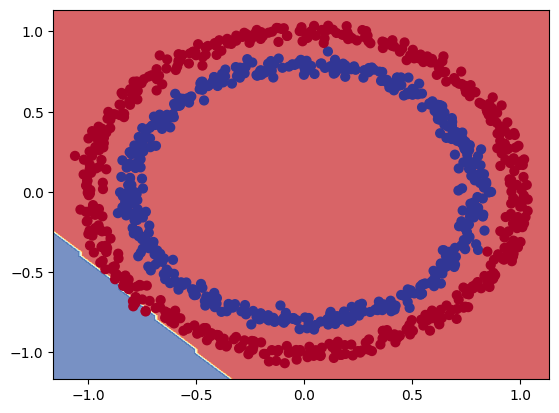

In [ ]:
plot_decision_boundary(model=model_2,X=X,y=y)

In [ ]:
# Let's see our model can be used for a regression problem
tf.random.set_seed(42)

model_new = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])


model_new.compile(loss=tf.keras.losses.mean_absolute_error,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["mean_absolute_error"])

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


model_new.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 361.7846 - mean_absolute_error: 361.7846
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 268.2260 - mean_absolute_error: 268.2260
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 176.7176 - mean_absolute_error: 176.7176
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 80.5928 - mean_absolute_error: 80.5928
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 55.7961 - mean_absolute_error: 55.7961
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 78.2021 - mean_absolute_error: 78.2021
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 62.0018 - mean_absolute_error: 62.0018
Epoch 8/100
5/5 [==============================] - 0s 87ms/step - loss: 42.9566 - mean_absolute_error: 42.9566
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 48.9158 - mean_absolute_error: 48.9158
Epo

2/2 [==============================] - 0s 6ms/step


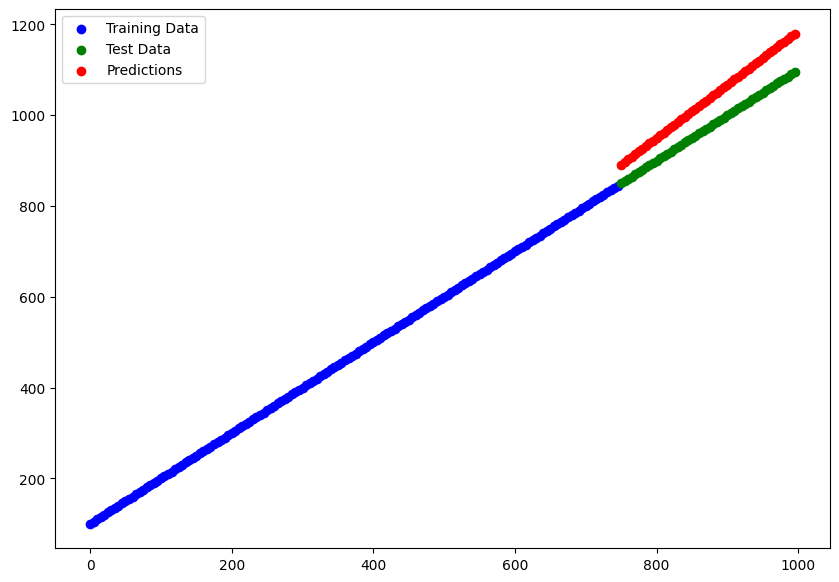

In [ ]:
# Make redictions
y_reg_preds = model_new.predict(X_reg_test)

# Plot
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

# The missing piece is non-linearity

In [ ]:
tf.random.set_seed(42)

# We are adding the activation functions
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_3.fit(X,y,epochs=200,verbose=0)
model_3.evaluate(X,y)


32/32 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8680


[0.31481972336769104, 0.8679999709129333]

313/313 [==============================] - 0s 1ms/step
Doing binary classification


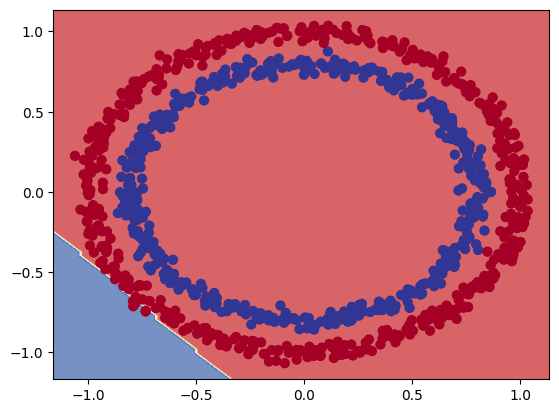

In [ ]:
# Check the data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

# And old prediction
plot_decision_boundary(model=model_2,X=X,y=y)

313/313 [==============================] - 0s 1ms/step
Doing binary classification


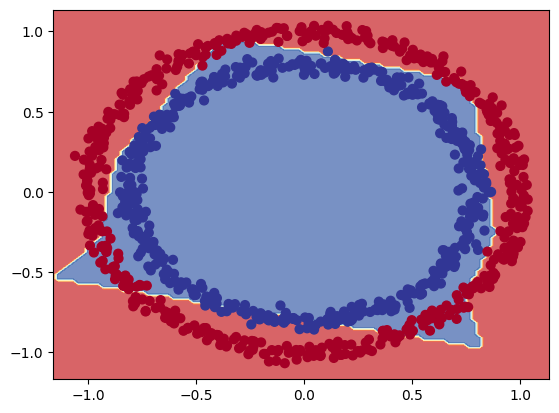

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

So activation functions is really important for classification for binary classification we are using **sigmoid** and for multiclass classification we are gonna use **softmax**

# Replicating Non-linear Activation Functions From Scratch

In [ ]:
 # Create toy tensor
 A = tf.cast(tf.range(-10,10),dtype=tf.float32)
 A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

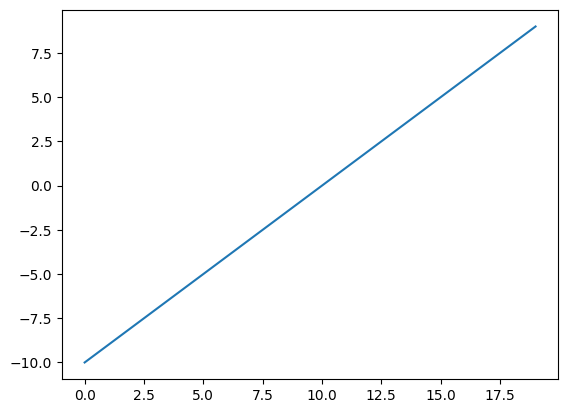

In [ ]:
plt.plot(A)

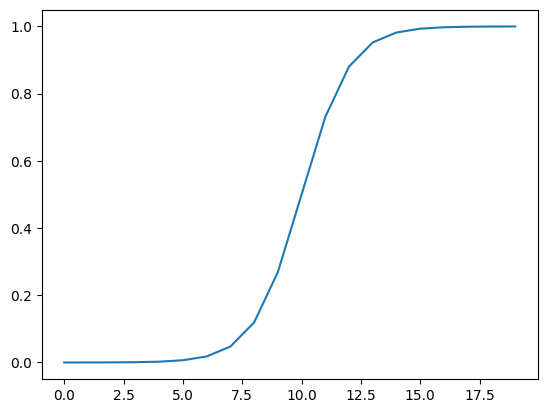

In [ ]:
# Let's start by repliating sigmoid- sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Using the sigmoid on A
sigmoid_A = sigmoid(A)

plt.plot(sigmoid_A)

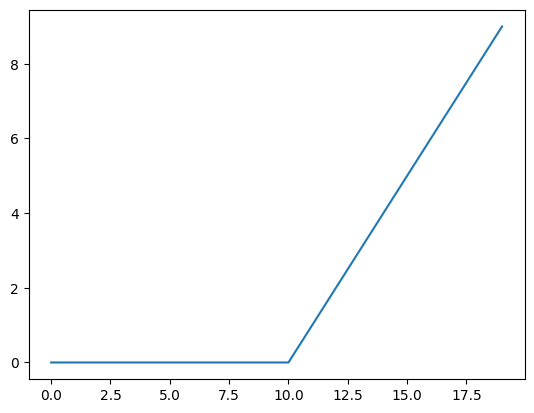

In [ ]:
# What about ReLu

def relu(x):
  return tf.maximum(0,x)

relu_A = relu(A)

plt.plot(relu_A)

Evlauating and improving our classification

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800],y[:800]
X_test, y_test = X[800:],y[800:]

# Creat new model
tf.random.set_seed(42)

newest_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

newest_model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                     metrics=["accuracy"])

history = newest_model.fit(X_train, y_train, epochs=50, verbose=0)
newest_model.evaluate(X_test,y_test)


7/7 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9900


[0.01351237203925848, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


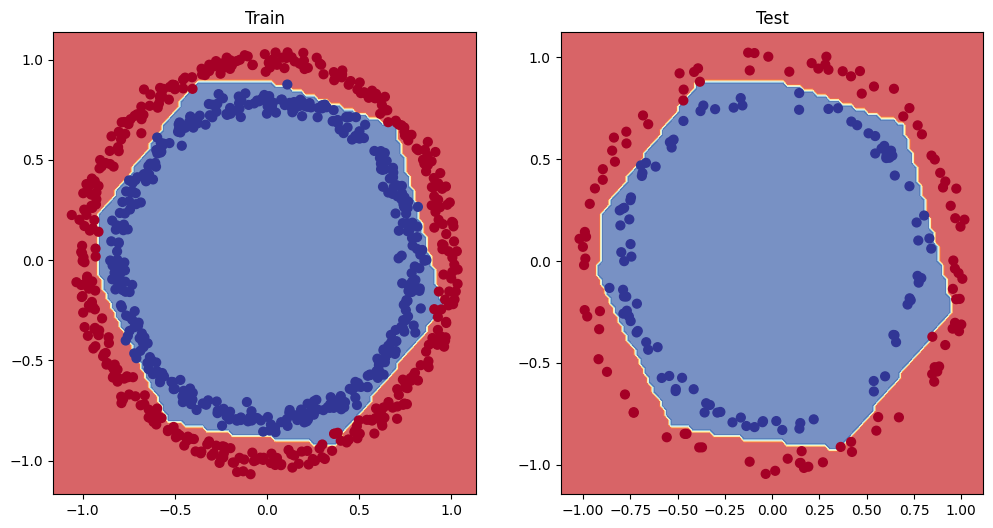

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=newest_model,
                       X=X_train,
                       y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=newest_model,
                       X=X_test,
                       y=y_test)
plt.show()

Plot the loss (or training) curves

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.176359,0.49250
1,0.170675,0.57125
2,0.168505,0.55000
3,0.166561,0.59000
4,0.165237,0.59375
5,0.163302,0.58875
6,0.160329,0.61875
7,0.160072,0.63125
8,0.153670,0.67125
9,0.145207,0.70875


Text(0.5, 1.0, 'Loss Curves')

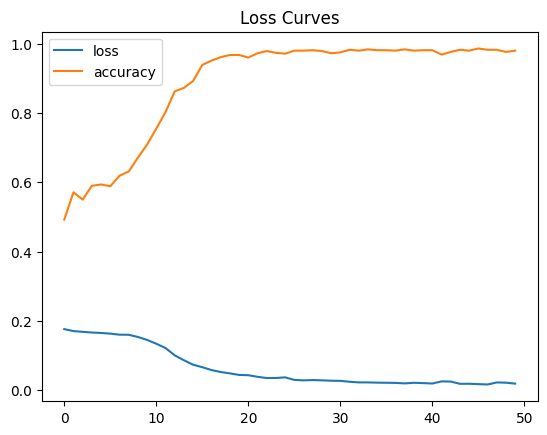

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Loss Curves")

# Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback**
* Another model
* A modified loss curves plot

In [ ]:
tf.random.set_seed(42)

model_t = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])

model_t.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_t.fit(X_train, y_train, epochs=100, verbose=1, callbacks=[callback])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.1793 - accuracy: 0.4913 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1788 - accuracy: 0.4913 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1784 - accuracy: 0.4925 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1778 - accuracy: 0.4950 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1773 - accuracy: 0.4925 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1769 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1764 - accuracy: 0.4900 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.4913 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: >

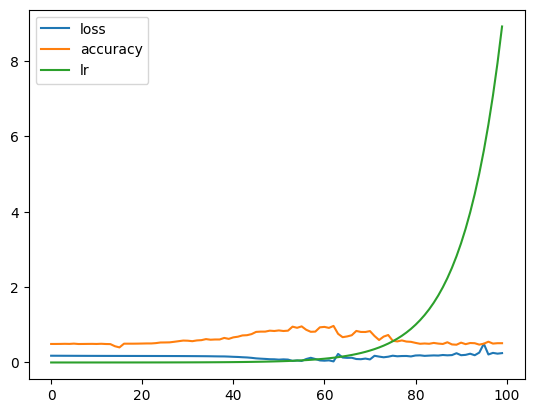

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot()

Text(0.5, 1.0, 'Learning rate vs Loss')

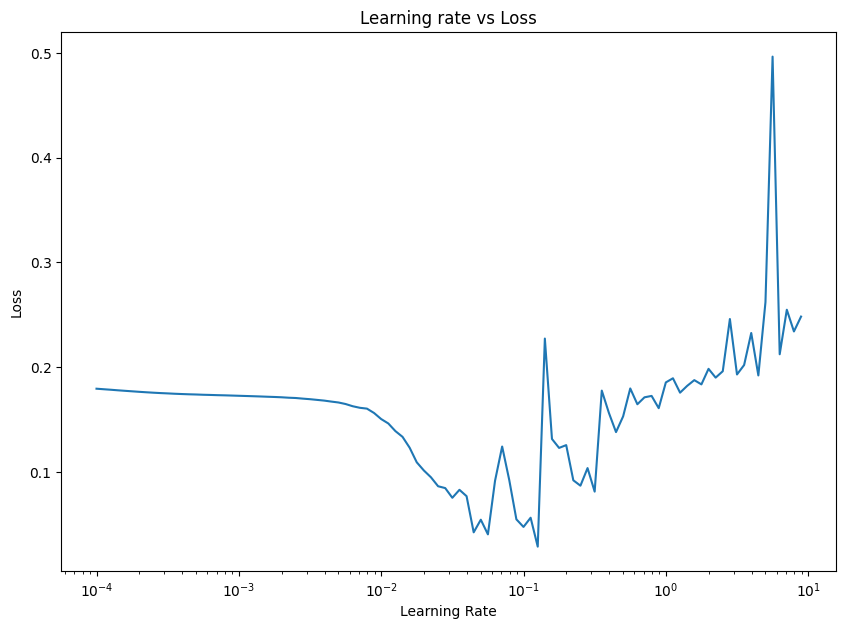

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

So as we can see from this graph ideal **learning rate** is somewhere between 10^-2 and 10^-1

,loss,accuracy
0,0.174222,0.51750
1,0.164871,0.58375
2,0.157727,0.64500
3,0.143417,0.73375
4,0.123059,0.80625
5,0.108549,0.82125
6,0.097881,0.84750
7,0.054604,0.94000
8,0.027849,0.98625
9,0.019763,0.98750


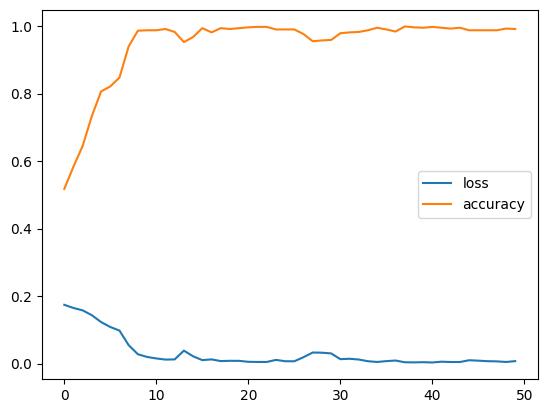

In [ ]:
tf.random.set_seed(42)

model_t = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])

model_t.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.04),
                metrics=["accuracy"])

callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_t.fit(X_train, y_train, epochs=50, verbose=0)

pd.DataFrame(history.history).plot()
pd.DataFrame(history.history)

# Classification Evaluation Methods

* Accuracy
* Precision
* Recall
* F1-Score
* Confusion Matrix
* Classification Report(sckit-learn)

In [ ]:
# Let's start with accuracy

loss, accuracy = model_t.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9900
Model loss on the test set: 0.006451584864407778
Model accuracy on the test set: 99.00%


**Creating confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = model_t.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_pred)

7/7 [==============================] - 0s 11ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

We have a problem with our prediction array. It's came out in prediction probabality form. The standard output from sigmoid (or softmax) activate functions are 0 and 1.

In [ ]:
# So we will use the tf.round() to make the prediction values 0 and 1
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

So let's continue for confusion matrix

In [ ]:
confusion_matrix(y_test, tf.round(y_pred))

array([[99,  2],
       [ 0, 99]])

It's look like shit right now so we need to make it fancy :) First one is just hard code and long second going to be easier

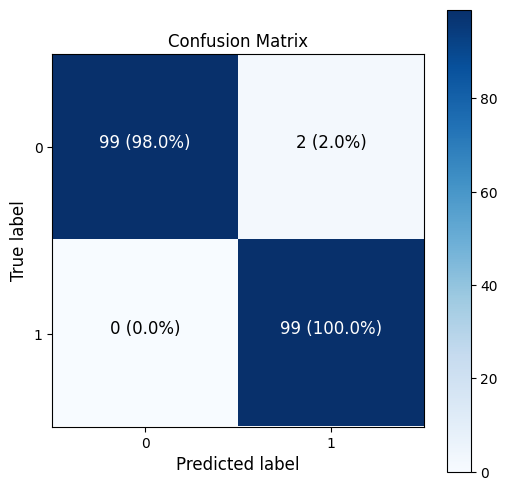

In [ ]:
import itertools

figsize = (6, 6)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.title.set_size(12)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=12)

**Now easy and better way to make it good visualized. We can also use seaborn library too but it's the most simplest way**

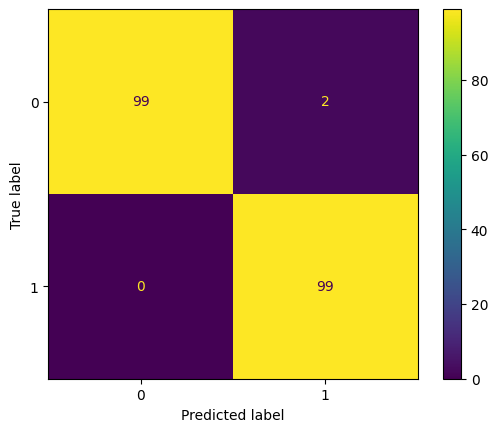

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, tf.round(y_pred))

#  Now we will work on larger example (multiclass classification)

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

**When you have more than two classes as an option, it's known as multi-class classification**

* To practice multi-calss classification, we're going to build a neural network to classify images of different items of clothing.

In [ ]:
# We will use builtin tensorflow dataset with 60,000 examples
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into train and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Trainig sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Trainig sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

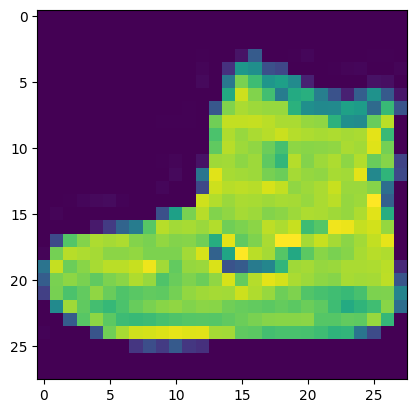

In [ ]:
# Plot a single sample
plt.imshow(train_data[0])

In [ ]:
# Check our sample label
train_labels[0]

9

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


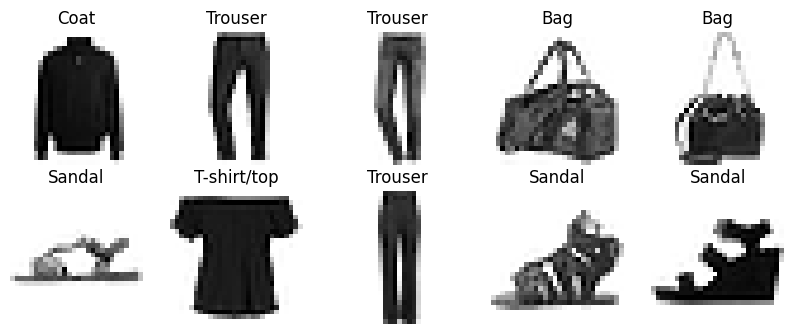

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(10,10))
for i in range(10):
  ax = plt.subplot(5,5,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Building a multi-class classification model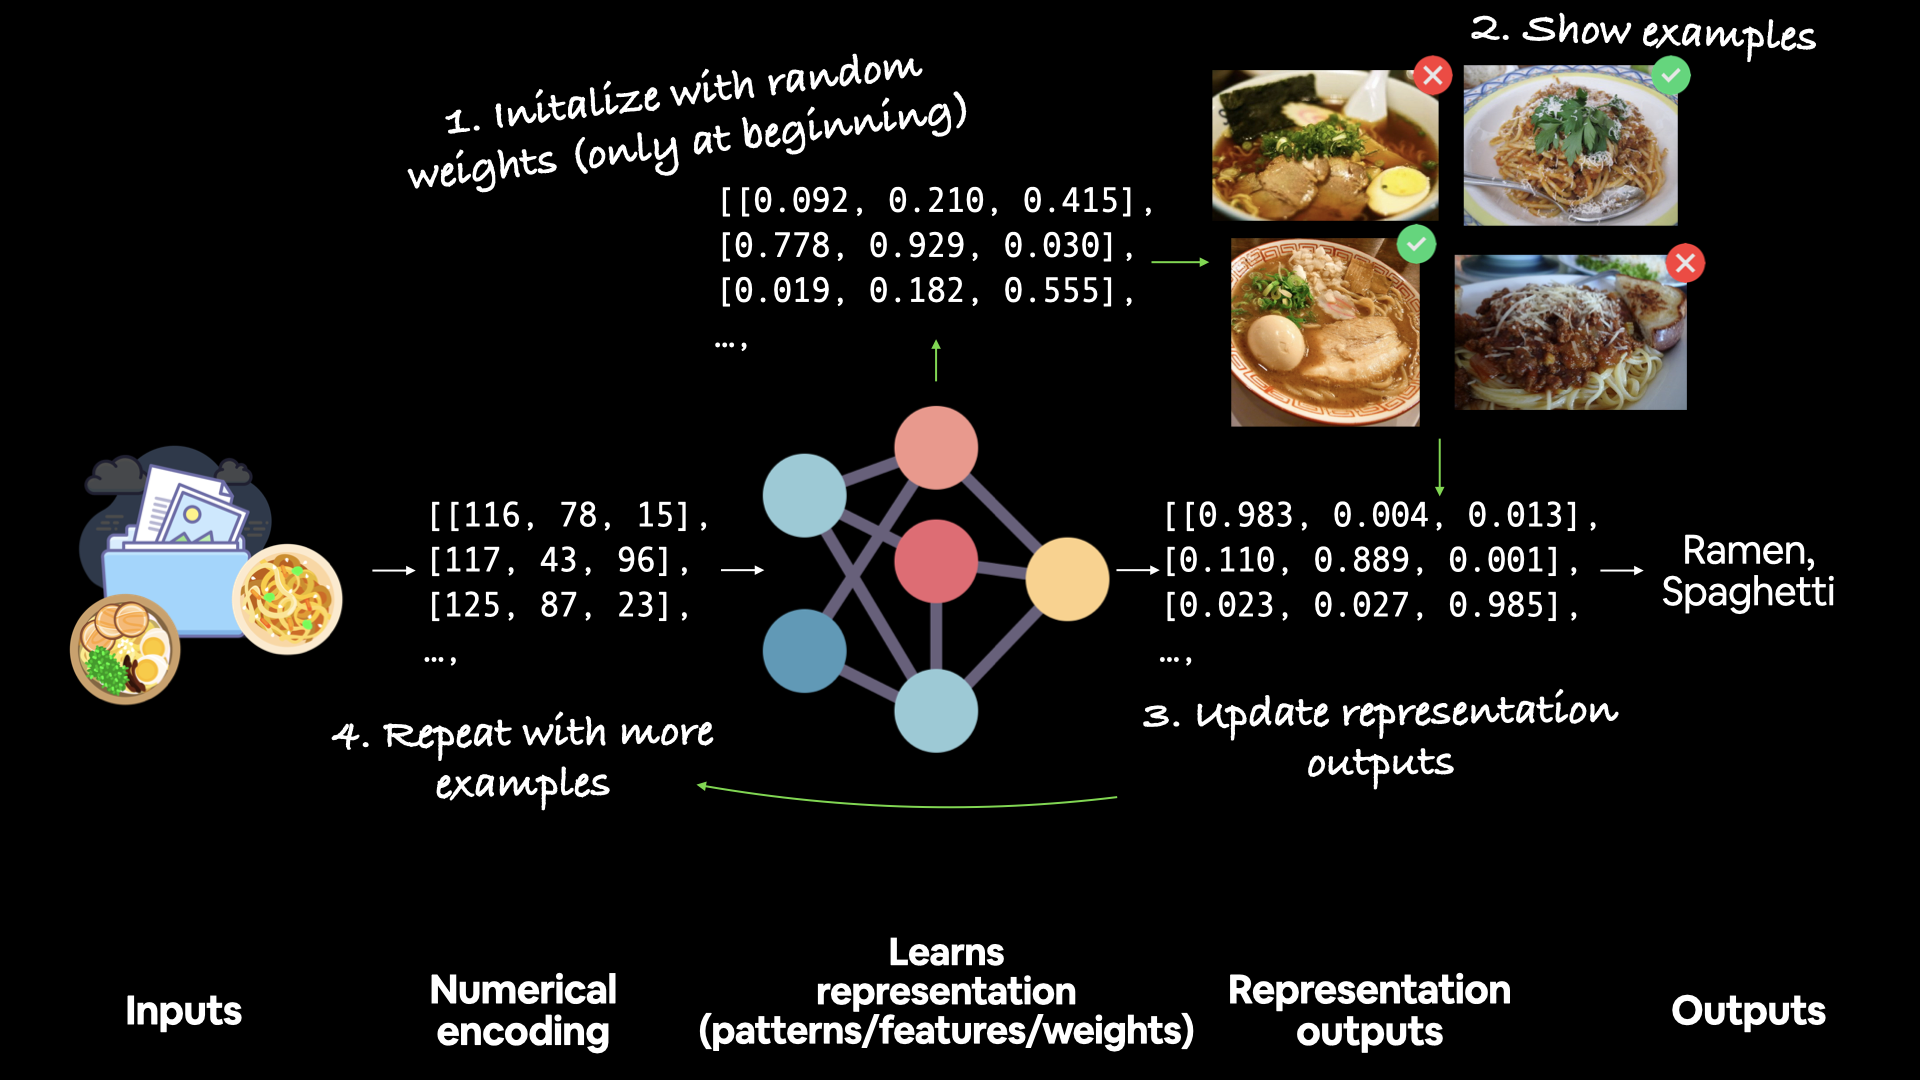

In [ ]:
train_data[8].shape

(28, 28)

In [ ]:
len(class_names)

10

SparseCategoricalCrossentropy() is using if the labels are integer, otherwise it must be one-hot encodded form and we're using CategoricalCrossentropy()

In [ ]:
# Create a model
tf.random.set_seed(42)

multiclass_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # input layer(we had to reshape it)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"), # output shape is 10
])

multiclass_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["accuracy"])

non_norm_history = multiclass_model.fit(train_data,
                               train_labels,
                               epochs=10,
                               validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.5093 - accuracy: 0.1073 - val_loss: 2.2809 - val_accuracy: 0.1180
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1205 - accuracy: 0.1659 - val_loss: 1.7864 - val_accuracy: 0.2379
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7401 - accuracy: 0.2609 - val_loss: 1.6768 - val_accuracy: 0.2855
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6751 - accuracy: 0.2836 - val_loss: 1.6710 - val_accuracy: 0.2588
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6472 - accuracy: 0.2932 - val_loss: 1.6371 - val_accuracy: 0.3069
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6295 - accuracy: 0.3019 - val_loss: 1.6829 - val_accuracy: 0.2558
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6190 - accuracy: 0.3080 - val_loss: 1.5849 - val_accuracy:

Improving performance with normalization

In [ ]:
# Check the model summary

multiclass_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the min and max valurs of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be sclaed (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Create a model
tf.random.set_seed(42)

multiclass_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

multiclass_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["accuracy"])

norm_history = multiclass_model_2.fit(train_data_norm,
                                      train_labels,
                                      epochs=10,
                                      validation_data=(test_data_norm,
                                                       test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2769 - accuracy: 0.5463 - val_loss: 0.8728 - val_accuracy: 0.6901
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7737 - accuracy: 0.7224 - val_loss: 0.7218 - val_accuracy: 0.7456
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6687 - accuracy: 0.7564 - val_loss: 0.6565 - val_accuracy: 0.7601
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6233 - accuracy: 0.7839 - val_loss: 0.6267 - val_accuracy: 0.7840
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5905 - accuracy: 0.7992 - val_loss: 0.6061 - val_accuracy: 0.7919
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5716 - accuracy: 0.8043 - val_loss: 0.5920 - val_accuracy: 0.8023
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5606 - accuracy: 0.8084 - val_loss: 0.6118 - val_accuracy:

**We only did simple normalization and accuracy went from 30% to 80%**

Let's visualize

In [ ]:
df_no_norm = pd.DataFrame(non_norm_history.history)
df_norm = pd.DataFrame(norm_history.history)

print(df_no_norm,"\n")
print(df_norm)

       loss  accuracy  val_loss  val_accuracy
0  2.509350  0.107333  2.280859        0.1180
1  2.120455  0.165917  1.786429        0.2379
2  1.740069  0.260850  1.676808        0.2855
3  1.675075  0.283600  1.670977        0.2588
4  1.647158  0.293200  1.637050        0.3069
5  1.629466  0.301917  1.682923        0.2558
6  1.618984  0.307967  1.584878        0.3285
7  1.599965  0.318167  1.587660        0.3200
8  1.586687  0.326567  1.571864        0.3295
9  1.576800  0.331150  1.582781        0.3338 

       loss  accuracy  val_loss  val_accuracy
0  1.276854  0.546317  0.872783        0.6901
1  0.773743  0.722383  0.721759        0.7456
2  0.668746  0.756400  0.656512        0.7601
3  0.623325  0.783850  0.626696        0.7840
4  0.590525  0.799217  0.606084        0.7919
5  0.571569  0.804300  0.592033        0.8023
6  0.560563  0.808367  0.611774        0.7859
7  0.551594  0.810250  0.572159        0.8040
8  0.545371  0.812800  0.568413        0.8046
9  0.540937  0.813850  0.567387 

<Axes: title={'center': 'Non-normalized Data'}>

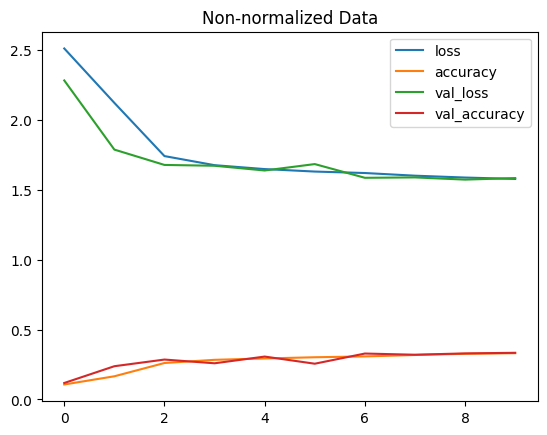

In [ ]:
df_no_norm.plot(title="Non-normalized Data")

<Axes: title={'center': 'Normalized Data'}>

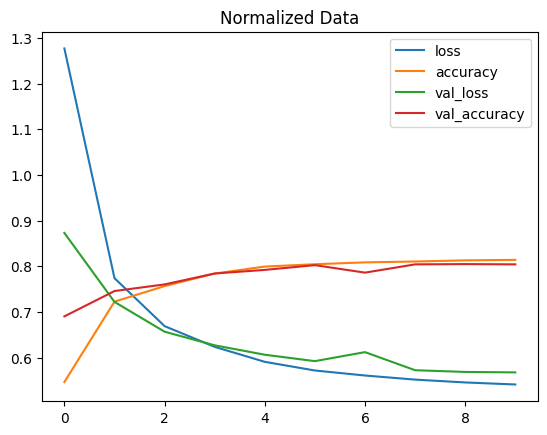

In [ ]:
df_norm.plot(title="Normalized Data")

Text(0.5, 1.0, 'Accuracy after Normalization')

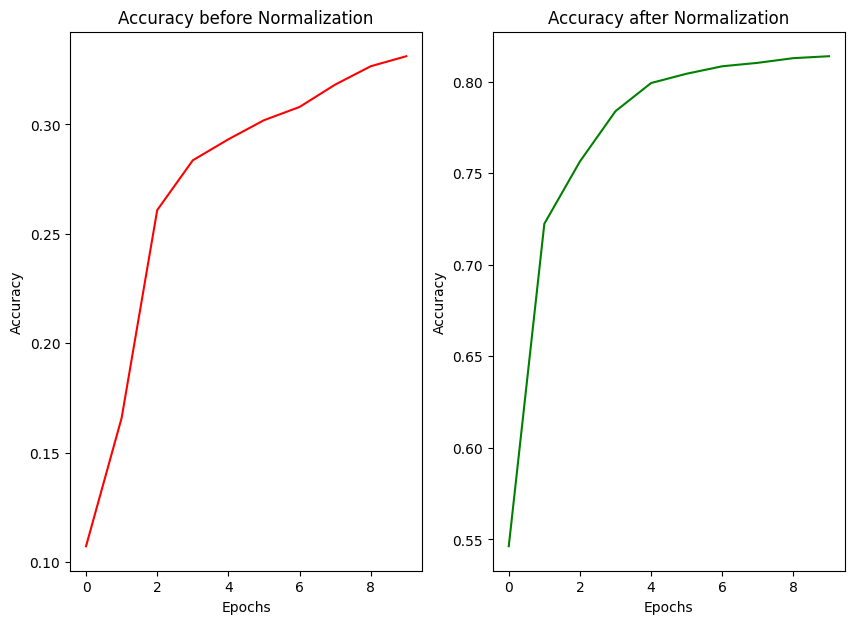

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(non_norm_history.history["accuracy"],"r")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy before Normalization")

plt.subplot(1,2,2)
plt.plot(norm_history.history["accuracy"],"g")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy after Normalization")

For Comparing

Text(0.5, 1.0, 'After Normalization')

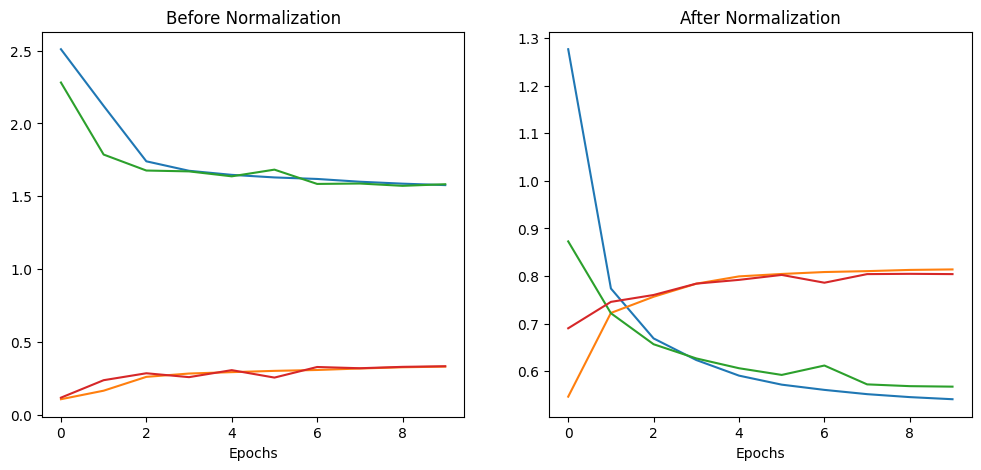

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(df_no_norm)
plt.xlabel("Epochs")
plt.title("Before Normalization")

plt.subplot(1,2,2)
plt.plot(df_norm)
plt.xlabel("Epochs")
plt.title("After Normalization")

When we want to compare new thing in our model just change one thing and then look at the results. Visualize them for comperation that's one of the key point because even one simple change as you can see in the example can cause dramatically changings.

**Now let's try to find ideal learning rate**

In [ ]:
tf.random.set_seed(42)

mlt_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

mlt_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
# That means start at the value of 1e-3 and slowly increase it in every epoch

find_lr_history = mlt_model.fit(train_data_norm,
              train_labels,
              epochs=40,
              validation_data=[test_data_norm,test_labels],
              callbacks = learning_rate_callback)

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9967 - accuracy: 0.6567 - val_loss: 0.6865 - val_accuracy: 0.7674 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6210 - accuracy: 0.7895 - val_loss: 0.6462 - val_accuracy: 0.7825 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5706 - accuracy: 0.8049 - val_loss: 0.5873 - val_accuracy: 0.7945 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5430 - accuracy: 0.8134 - val_loss: 0.5630 - val_accuracy: 0.8077 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5307 - accuracy: 0.8155 - val_loss: 0.5715 - val_accuracy: 0.8035 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5195 - accuracy: 0.8192 - val_loss: 0.5717 - val_accuracy: 0.8025 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

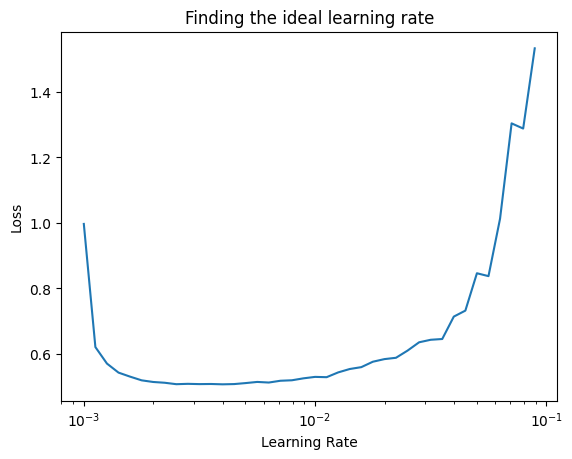

In [ ]:
# Plot learning rate decay curve with using (1e-3 * 10**(epoch/20)) this formula
learning_rate_schedule = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(learning_rate_schedule, find_lr_history.history["loss"] )
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

So we can say optimal learning rate value for this example is somewhere near 10^-3 which default value of Adam optimizer's learning rate

# **Let's try to evaluate our model further**

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by training longer or changing the architecture)
* Save and export it for use in an application

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

y_probs = multiclass_model_2.predict(test_data_norm)

y_probs[0]

313/313 [==============================] - 1s 2ms/step


array([2.0108321e-10, 1.7914049e-20, 1.1985118e-11, 9.1557872e-12,
       1.3859289e-08, 3.3338866e-01, 1.9738037e-08, 2.8636141e-02,
       5.6338289e-05, 6.3791877e-01], dtype=float32)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
y_preds, test_labels

(array([9, 2, 1, ..., 8, 1, 5]), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

As you can see they are same type right now

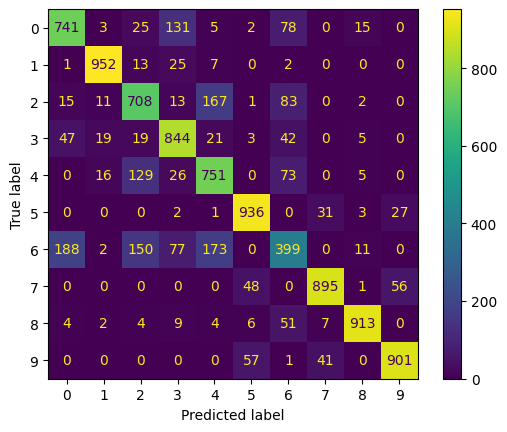

In [ ]:
# Let's visualize
ConfusionMatrixDisplay.from_predictions(test_labels, y_preds)

And we get the confusion matrix.

And let's create a interesting function

In [ ]:
import random

def plot_random_image(model, images, true_label, classes):
  """
  Picks a random image, plots it and labels it with a predition and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs =model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_label[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color= "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 23ms/step


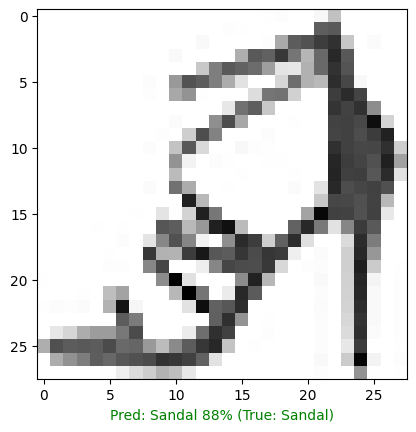

In [ ]:
plot_random_image(multiclass_model_2,
                  images= test_data_norm,
                  true_label = test_labels,
                  classes = class_names)

What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
multiclass_model_2.layers

In [ ]:
# Extract a particular layer
multiclass_model_2.layers[1]

# Get the patterns of a layer in our network
weights, biases = multiclass_model_2.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.10124685,  0.11873077,  0.07249558, -0.03957978],
        [-0.20148821,  0.1632079 ,  0.33285055, -0.27660686],
        [ 0.27899018,  0.2915404 ,  0.26674724, -0.49764058],
        ...,
        [-0.3025744 , -0.34627363,  0.29489827, -0.06372392],
        [-0.3483195 , -0.9451857 ,  0.12625068,  0.23950197],
        [ 0.01862341, -0.48042706, -0.05167773, -0.15924227]],
       dtype=float32),
 (784, 4))

In [ ]:
# Let's check out the biases shapes
biases, biases.shape

(array([1.2036552, 2.27275  , 0.352783 , 1.1303692], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of TensorFlow Dense layer)

The bias vectır dictates how much patterns within the corresponding weights matrix should influence the next layer

In [ ]:
multiclass_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


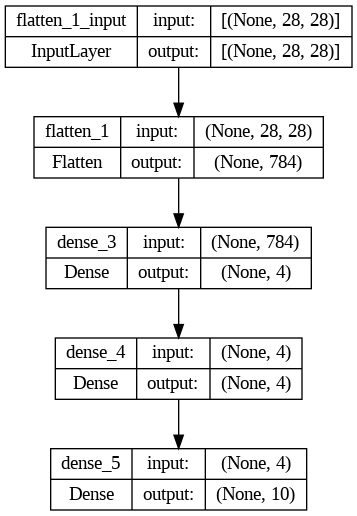

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(multiclass_model_2, show_shapes=True)